In [1]:
'''
Refer to https://pypi.org/project/yfinance/ for some form of documentation
'''
import yfinance as yf
from pytz import timezone
import numpy as np


In [36]:
tickers = 'AAPL,TSLA,TWTR,IBM'.split(',')
period = '1mo'; interval = '15m'
data = yf.download(tickers = tickers, 
    period = period, interval = interval, group_by = 'ticker', prepost = True)

[*********************100%***********************]  4 of 4 completed


In [42]:
df = data['TSLA'].copy()

In [43]:
df['date_hours'] = df.reset_index()['Datetime'].map(lambda x: x.hour + x.minute/60.).values

In [44]:
dfnan = df[df.Open.isna()].copy()

In [45]:
dfnan[(dfnan['date_hours'] < 9.5) | (dfnan['date_hours'] > 16)]

,Open,High,Low,Close,Adj Close,Volume,date_hours
Datetime,,,,,,,
2020-12-29 05:15:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,5.25
2020-12-30 04:30:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,4.50
2020-12-30 05:15:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,5.25
2020-12-30 06:45:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,6.75
2020-12-31 04:30:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,4.50
2020-12-31 05:15:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,5.25
2021-01-05 06:15:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,6.25
2021-01-13 06:15:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,6.25
2021-01-15 06:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,6.00


In [46]:
df[(df['date_hours'] < 9.5) | (df['date_hours'] > 16)]

,Open,High,Low,Close,Adj Close,Volume,date_hours
Datetime,,,,,,,
2020-12-29 04:15:00-05:00,665.00,666.66,663.00,666.66,666.66,0.0,4.25
2020-12-29 04:30:00-05:00,666.66,667.00,666.66,667.00,667.00,0.0,4.50
2020-12-29 04:45:00-05:00,667.96,667.96,667.38,667.38,667.38,0.0,4.75
2020-12-29 05:00:00-05:00,666.66,666.66,666.66,666.66,666.66,0.0,5.00
2020-12-29 05:15:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,5.25
...,...,...,...,...,...,...,...
2021-01-28 18:45:00-05:00,833.15,833.70,830.59,830.81,830.81,0.0,18.75
2021-01-28 19:00:00-05:00,831.70,832.00,830.49,831.47,831.47,0.0,19.00
2021-01-28 19:15:00-05:00,831.47,831.95,830.30,830.31,830.31,0.0,19.25


In [35]:
df

,Open,High,Low,Close,Adj Close,Volume,date_hours
Datetime,,,,,,,
2020-12-29 04:15:00-05:00,137.50,137.95,137.35,137.35,137.35,0.0,4.25
2020-12-29 04:30:00-05:00,137.38,137.57,137.15,137.54,137.54,0.0,4.50
2020-12-29 04:45:00-05:00,137.52,137.63,137.52,137.58,137.58,0.0,4.75
2020-12-29 05:00:00-05:00,137.53,137.65,137.51,137.51,137.51,0.0,5.00
2020-12-29 05:15:00-05:00,137.50,137.60,137.49,137.58,137.58,0.0,5.25
...,...,...,...,...,...,...,...
2021-01-28 18:45:00-05:00,137.50,137.57,136.75,136.95,136.95,0.0,18.75
2021-01-28 19:00:00-05:00,136.92,137.15,136.82,137.10,137.10,0.0,19.00
2021-01-28 19:15:00-05:00,137.10,137.11,136.70,136.70,136.70,0.0,19.25


In [10]:
len(list(df[df.Open.isna()].index))

256

In [3]:
ticker = yf.Ticker("IBM")
data = ticker.history(period = '1mo',
                   interval = '15m').reset_index()
# data['Datetime'] = data.Datetime.map(lambda x: x.replace(tzinfo=timezone('GMT')))

In [4]:
data

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-12-29 09:30:00-05:00,125.349998,125.349998,124.540100,124.796501,154511,0,0
1,2020-12-29 09:45:00-05:00,124.750000,125.264397,124.680000,124.900002,107365,0,0
2,2020-12-29 10:00:00-05:00,124.910004,125.432999,124.900002,125.180000,149006,0,0
3,2020-12-29 10:15:00-05:00,125.190002,125.480003,124.790001,124.820000,117746,0,0
4,2020-12-29 10:30:00-05:00,124.809998,124.839996,124.472198,124.550003,119996,0,0
...,...,...,...,...,...,...,...,...
541,2021-01-28 14:45:00-05:00,120.470001,121.150002,120.470001,121.065002,230777,0,0
542,2021-01-28 15:00:00-05:00,121.050003,121.260002,120.915001,121.160004,231431,0,0
543,2021-01-28 15:15:00-05:00,121.160004,121.185997,120.820000,120.836998,199232,0,0
544,2021-01-28 15:30:00-05:00,120.820000,120.940002,120.349998,120.459999,330099,0,0


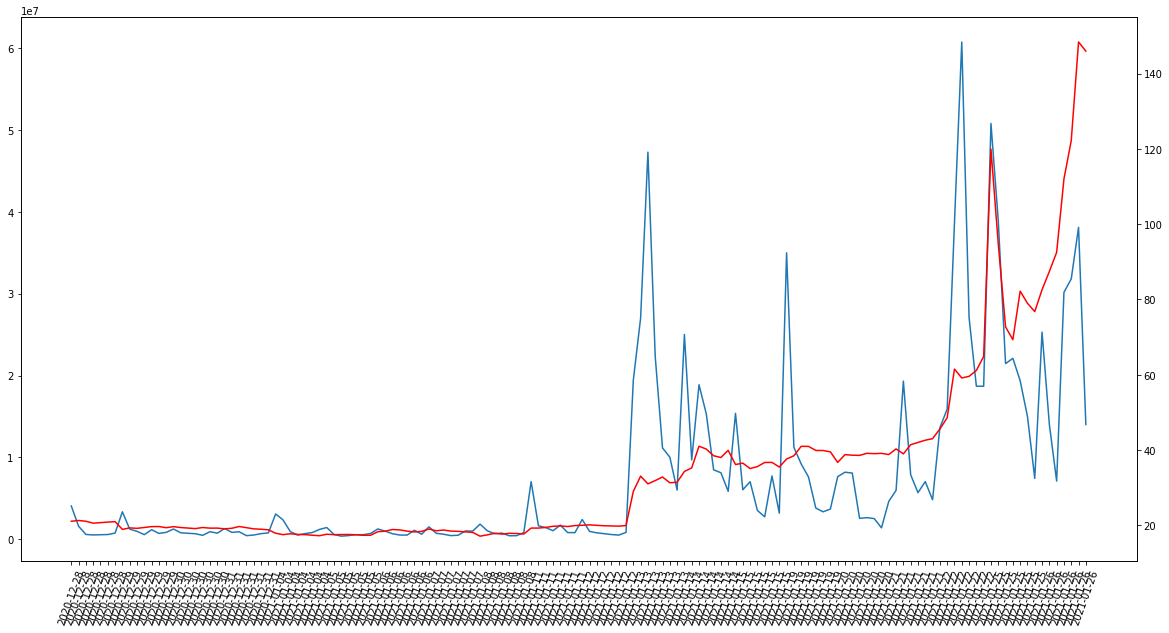

In [44]:
import matplotlib.pyplot as plt
import numpy as np
x = range(data.shape[0])
y = data['Volume'].values
# y = np.log(y)
y2 = data['Close'].values

fig, ax1 = plt.subplots(figsize = [20,10])
ax1.plot(x,y)
# plt.xticks(data['Date'].map(lambda x: x.date()).values)
ax1.set_xticks(x)
ax1.set_xticklabels(data['Date'].map(lambda x: x.date()).values)
ax1.tick_params(axis = 'x', labelrotation= 70)
ax2 = ax1.twinx()
ax2.plot(x,y2, color = 'r')
plt.show()

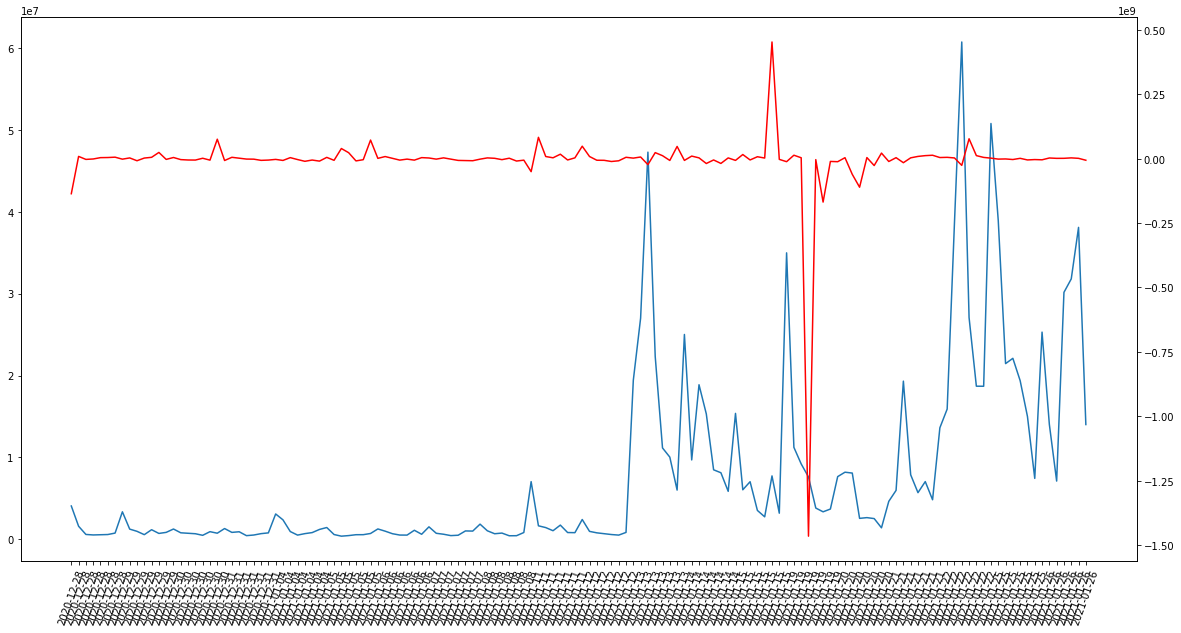

In [45]:
import matplotlib.pyplot as plt
import numpy as np
x = range(data.shape[0])
y = data['Volume'].values
# y = np.log(y)
y2 = data['Volume'] / (data['Close'] - data['Open'])

fig, ax1 = plt.subplots(figsize = [20,10])
ax1.plot(x,y)
# plt.xticks(data['Date'].map(lambda x: x.date()).values)
ax1.set_xticks(x)
ax1.set_xticklabels(data['Date'].map(lambda x: x.date()).values)
ax1.tick_params(axis = 'x', labelrotation= 70)
ax2 = ax1.twinx()
ax2.plot(x,y2, color = 'r')
plt.show()

In [62]:
from datetime import datetime

def convert_dt_to_epoch(x):
    # converting the New York (UTC-5) to epoch
    # have to do some manipulation by using a 'wrong' conversion and compensating it
    x = x.replace(tzinfo = timezone('GMT')) # timezone changes, but time itself doesnt
    x = (x - datetime(1970,1,1,tzinfo=timezone('GMT'))).total_seconds() # as epoch
    x = x + 5*60*60 # compensating the time difference 
    return x
data['Epoch'] = data.Datetime.map(convert_dt_to_epoch)

In [63]:
for i,bar in data.iloc[:10].iterrows():
    print(i)
    print((bar.Epoch, bar.Open, bar.High, bar.Low, bar.Close, bar.Volume))

0
(1607351400.0, 122.31, 122.71, 122.25, 122.69, 2551266)
1
(1607351460.0, 122.68, 123.0, 122.61, 122.92, 719289)
2
(1607351520.0, 122.93, 122.96, 122.92, 122.96, 24870)
3
(1607351640.0, 123.08, 123.11, 123.0, 123.08, 1778390)
4
(1607351700.0, 123.09, 123.17, 123.08, 123.14, 103656)
5
(1607351760.0, 123.29, 123.4, 123.25, 123.37, 1474624)
6
(1607351820.0, 123.38, 123.51, 123.36, 123.45, 637078)
7
(1607351880.0, 123.45, 123.56, 123.33, 123.4, 509387)
8
(1607351940.0, 123.4, 123.5, 123.29, 123.47, 486050)
9
(1607352000.0, 123.46, 123.47, 123.28, 123.3, 434089)


Timestamp('2020-12-07 09:30:00-0500', tz='America/New_York')

In [38]:
data

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-12-07 09:30:00+00:00,122.31,122.71,122.25,122.69,2551266,0,0
1,2020-12-07 09:31:00+00:00,122.68,123.00,122.61,122.92,719289,0,0
2,2020-12-07 09:32:00+00:00,122.93,122.96,122.92,122.96,24870,0,0
3,2020-12-07 09:34:00+00:00,123.08,123.11,123.00,123.08,1778390,0,0
4,2020-12-07 09:35:00+00:00,123.09,123.17,123.08,123.14,103656,0,0
...,...,...,...,...,...,...,...,...
382,2020-12-07 15:55:00+00:00,123.61,123.64,123.57,123.60,269329,0,0
383,2020-12-07 15:56:00+00:00,123.61,123.70,123.60,123.68,237519,0,0
384,2020-12-07 15:57:00+00:00,123.68,123.70,123.62,123.62,306309,0,0
385,2020-12-07 15:58:00+00:00,123.62,123.74,123.61,123.71,331837,0,0


In [12]:

a = data['Datetime'].iloc[0]

In [13]:
a

Timestamp('2020-12-07 09:30:00-0800', tz='US/Pacific')

In [8]:
## multiple symbols at a time

# by values
# data = yf.download(tickers = 'AAPL MSFT TSLA NIO', period = '5d', interval = '1m')
# data = data.stack().reset_index()
# data['Datetime'] = data.Datetime.map(lambda x: x.replace(tzinfo=timezone('US/Pacific')))
# data = data.rename({'level_1':'symbol'}, axis = 1)

# by symbol
data = yf.download(tickers = 'AAPL MSFT TSLA NIO', period = '1mo', interval = '15m', group_by = 'ticker')
# data = data.reset_index()
# data['Datetime'] = data.Datetime.map(lambda x: x.replace(tzinfo=timezone('US/Pacific')))
# data = data.rename({'level_1':'symbol'}, axis = 1)


[*********************100%***********************]  4 of 4 completed


In [9]:
data.shape

(535, 24)

In [4]:
data.index[-1]

Timestamp('2021-01-07 15:59:00-0500', tz='America/New_York')

In [10]:
data.tail(10).dropna()

NIO                                   \
                                Open       High        Low      Close   
Datetime                                                                
2021-01-07 13:30:00-05:00  54.263500  54.500000  53.950001  54.075001   
2021-01-07 13:45:00-05:00  54.070000  54.220001  53.910000  54.080002   
2021-01-07 14:00:00-05:00  54.080002  54.330002  54.029999  54.038502   
2021-01-07 14:15:00-05:00  54.035000  54.384201  53.970001  54.384201   
2021-01-07 14:30:00-05:00  54.388500  54.610001  54.250000  54.415298   
2021-01-07 14:45:00-05:00  54.417301  54.439999  54.040001  54.119999   
2021-01-07 15:00:00-05:00  54.109501  54.250000  53.660000  53.810001   
2021-01-07 15:15:00-05:00  53.812199  54.139999  53.802502  54.044998   
2021-01-07 15:30:00-05:00  54.044399  54.290001  53.963200  54.169899   
2021-01-07 15:45:00-05:00  54.160000  54.400002  54.040001  54.250000   

                                                     AAPL              \
                           Adj Close   Volume        Open        High   
Datetime                                                                
2021-01-07 13:30:00-05:00  54.075001  3605394  130.369995  130.559998   
2021-01-07 13:45:00-05:00  54.080002  2123240  130.509995  130.520004   
2021-01-07 14:00:00-05:00  54.038502  2072282  130.309998  130.600006   
2021-01-07 14:15:00-05:00  54.384201  1954053  130.455002  130.639999   
2021-01-07 14:30:00-05:00  54.415298  3665483  130.614395  130.679993   
2021-01-07 14:45:00-05:00  54.119999  2841346  130.485001  130.779999   
2021-01-07 15:00:00-05:00  53.810001  3639088  130.772400  130.960007   
2021-01-07 15:15:00-05:00  54.044998  2771944  130.869995  131.214996   
2021-01-07 15:30:00-05:00  54.169899  2245437  131.210007  131.350006   
2021-01-07 15:45:00-05:00  54.250000  4245571  131.195007  131.630005   

                                                   ...        MSFT  \
                                  Low       Close  ...         Low   
Datetime                                           ...               
2021-01-07 13:30:00-05:00  130.250000  130.514999  ...  218.199997   
2021-01-07 13:45:00-05:00  130.210007  130.300003  ...  218.270004   
2021-01-07 14:00:00-05:00  130.279999  130.455002  ...  218.169998   
2021-01-07 14:15:00-05:00  130.389999  130.616806  ...  217.869995   
2021-01-07 14:30:00-05:00  130.450104  130.490005  ...  217.846497   
2021-01-07 14:45:00-05:00  130.414505  130.774994  ...  218.139999   
2021-01-07 15:00:00-05:00  130.460007  130.860001  ...  218.580002   
2021-01-07 15:15:00-05:00  130.830795  131.210007  ...  218.729996   
2021-01-07 15:30:00-05:00  131.039993  131.199997  ...  218.940002   
2021-01-07 15:45:00-05:00  130.820007  130.860001  ...  218.149994   

                                                                  TSLA  \
                                Close   Adj Close   Volume        Open   
Datetime                                                                 
2021-01-07 13:30:00-05:00  218.539993  218.539993   421282  799.705017   
2021-01-07 13:45:00-05:00  218.580002  218.580002   397797  803.719971   
2021-01-07 14:00:00-05:00  218.320007  218.320007   377071  805.390015   
2021-01-07 14:15:00-05:00  217.929993  217.929993   327958  806.320007   
2021-01-07 14:30:00-05:00  218.230499  218.230499   351140  809.780029   
2021-01-07 14:45:00-05:00  218.696701  218.696701   459320  809.491882   
2021-01-07 15:00:00-05:00  218.779999  218.779999   652744  806.750000   
2021-01-07 15:15:00-05:00  219.190002  219.190002   622671  809.190002   
2021-01-07 15:30:00-05:00  219.020004  219.020004   767360  811.599976   
2021-01-07 15:45:00-05:00  218.289993  218.289993  1986128  810.494995   

                                                                           \
                                 High         Low       Close   Adj Close   
Datetime                                                                    
2021-01-07 13:30:00-05:00  8

In [15]:
def calculate_rsi(val, prevU = 0, prevD = 0, n = 9):
    if val > 0:
        avgU = (prevU*(n-1) + val) / n
        avgD = prevD*((n-1)/n)
    else:
        avgU = prevU*((n-1)/n)
        avgD = (prevD*(n-1) - val) / n

    rs = avgU / (avgD + 1e-5)
    rsi = 100.0 - 100.0 / (1 + rs)
    return rsi, avgU, avgD


rows = data['NIO']['Close'].values
rows = rows[1:] - rows[:-1] # make prices to deltas

# initial calculation
n = 9
vals = rows[:n]
prevU = np.sum(vals * (vals > 0).astype(int)) / n
prevD = -1 * np.sum(vals * (vals < 0).astype(int)) / n

for i in range(n, len(rows)):
    rsi, prevU, prevD = calculate_rsi(rows[i], prevU, prevD, n)

In [16]:
rsi

58.32552951419281

In [21]:
data2 = data.copy()
for i in ['AAPL','MSFT','TSLA','NIO']:
    data2 = data2[data2[(i,'Volume')] != 0]
data2.tail()

MSFT                                      \
                                 Open        High         Low       Close   
Datetime                                                                    
2020-12-08 13:32:00-05:00  216.820007  216.906403  216.809998  216.899994   
2020-12-08 13:33:00-05:00  216.908997  216.910004  216.822098  216.860001   
2020-12-08 13:34:00-05:00  216.860001  216.880005  216.820007  216.850006   
2020-12-08 13:35:00-05:00  216.839996  216.910004  216.830002  216.869995   
2020-12-08 13:36:00-05:00  216.869995  216.927094  216.820007  216.820007   

                                                      AAPL              \
                            Adj Close   Volume        Open        High   
Datetime                                                                 
2020-12-08 13:32:00-05:00  216.899994  46619.0  124.629997  124.710098   
2020-12-08 13:33:00-05:00  216.860001  24136.0  124.688202  124.688202   
2020-12-08 13:34:00-05:00  216.850006  20755.0  124.665802  124.690002   
2020-12-08 13:35:00-05:00  216.869995  22579.0  124.656303  124.669998   
2020-12-08 13:36:00-05:00  216.820007  22886.0  124.629303  124.649300   

                                                   ...        NIO             \
                                  Low       Close  ...        Low      Close   
Datetime                                           ...                         
2020-12-08 13:32:00-05:00  124.629997  124.678001  ...  46.070000  46.115002   
2020-12-08 13:33:00-05:00  124.639999  124.664299  ...  46.084099  46.099998   
2020-12-08 13:34:00-05:00  124.650002  124.660004  ...  46.090000  46.099998   
2020-12-08 13:35:00-05:00  124.610001  124.627998  ...  46.090000  46.124001   
2020-12-08 13:36:00-05:00  124.449997  124.500000  ...  46.049999  46.077000   

                                                      TSLA              \
                           Adj Close    Volume        Open        High   
Datetime                                                                 
2020-12-08 13:32:00-05:00  46.115002   54861.0  639.589294  639.780029   
2020-12-08 13:33:00-05:00  46.099998   50730.0  639.700012  640.000000   
2020-12-08 13:34:00-05:00  46.099998   60403.0  638.849976  639.609985   
2020-12-08 13:35:00-05:00  46.124001   57658.0  638.914978  639.799988   
2020-12-08 13:36:00-05:00  46.077000  125463.0  639.520020  641.150024   

                                                                         
                                  Low       Close   Adj Close    Volume  
Datetime                                                                 
2020-12-08 13:32:00-05:00  638.669983  639.599976  639.599976  122688.0  
2020-12-08 13:33:00-05:00  638.799988  638.799988  638.799988  168525.0  
2020-12-08 13:34:00-05:00  638.799988  638.922913  638.922913   94954.0  
2020-12-08 13:35:00-05:00  638.599976  639.610107  639.610107  117281.0  
2020-12-08 13:36:00-05:00  636.739990  637.710022  637.710022  443470.0  

[5 rows x 24 columns]

In [6]:
data.index[-1]

Timestamp('2020-12-08 12:57:49-0500', tz='America/New_York')

In [ ]:
## check the stock is increasing in a mid-long term scale (1-3 month?)

## calculate the rsi and macd 

## determine if the stock is oversold/underbought as a buying point

## determine if the stock is overbought/undersold as a selling point

## measure across different timeframes (maybe different new symbols) to check if
## the buying/selling logic outperforms buy/hold

## revise as needed

In [211]:
'''
Increasing Mid-Long Term

What defines mid-long term growth? 
- expected to grow (weak ML prediction?)
- high rsi (bullish)

''' 

symbols = ['AMD']#['AAPL','MSFT','TSLA','GOOGL']
for symbol in symbols:
    ticker = yf.Ticker(symbol)
    data = ticker.history(period = '1d',
                       interval = '5m').reset_index()
    data['Datetime'] = data.Datetime.map(lambda x: x.replace(tzinfo=timezone('US/Pacific')))

In [212]:
def calculate_rsi(val, prevU = 0, prevD = 0, n = 9):
    if val > 0:
        avgU = (prevU*(n-1) + val) / n
        avgD = prevD*((n-1)/n)
    else:
        avgU = prevU*((n-1)/n)
        avgD = (prevD*(n-1) - val) / n

    rs = avgU / (avgD + 1e-5)
    rsi = 100.0 - 100.0 / (1 + rs)
    return rsi, avgU, avgD

def calculate_ema(new_val, last_ema, interval, smoothing):
    x = new_val*(smoothing / (1 + interval)) + last_ema*(1-(smoothing / (1 + interval)))
    return x

def calculate_macd(val, last_long_ema, last_short_ema,
                   long_int = 26, short_int = 12, smoothing = 2):
    
    long_ema = calculate_ema(val, last_long_ema, long_int, smoothing)
    short_ema = calculate_ema(val, last_short_ema, short_int, smoothing)
    macd = short_ema - long_ema
    return macd, long_ema, short_ema

In [213]:
rsi_list = []
rows = data['Close'].values
rows = rows[1:] - rows[:-1]
prevU = 0; prevD = 0

vals = rows[:9]
prevU = np.sum(vals * (vals > 0).astype(int)) / 9
prevD = -1 * np.sum(vals * (vals < 0).astype(int)) / 9

for i in range(9, len(rows)):
    rsi_, prevU, prevD = calculate_rsi(rows[i], prevU, prevD, 9)
    rsi_list.append(rsi_)

In [214]:

# initialize 
vals = data['Close'].values
smoothing = 2
long_int = 26; short_int = 12 # accepted norm of ema lengths for macd
long_ema = np.mean(vals[:long_int]) # simple average of first 26 values
short_ema = np.mean(vals[(long_int - short_int):long_int]) # simple average of last 12 values from 26th index
macd_list = []

# measure macd
for i in range(long_int, len(vals)):
    macd, long_ema, short_ema = calculate_macd(vals[i], long_ema, short_ema, long_int, short_int, smoothing)
    macd_list.append(macd)

# measure signal line 
int_len = 9
vals = np.array(macd_list)
ema = np.mean(vals[:int_len]) # starting ema is simple average
ema_list = [ema]

for i in range(int_len, len(vals)):
    ema = calculate_ema(vals[i], ema, int_len, smoothing)
    ema_list.append(ema)

In [215]:
## points to buy/sell 
# logic #1: when macd crosses signal
macd_trade = macd_list[(len(macd_list) - len(ema_list)):]
macd_greater = np.array([int(x>y) for x,y in zip(macd_trade, ema_list)])
macd_signals = macd_greater[1:] - macd_greater[:-1]
buy_signals = list(map(int,macd_signals == 1))
sell_signals = list(map(int,macd_signals == -1))

In [216]:
# # logic #2.1: when difference of macd and signal are at vertices
# macd_trade = np.array(macd_list[-len(ema_list):])
# signal_trade = np.array(ema_list)
# diff_ = macd_trade - signal_trade
# delta_ = diff_[1:] - diff_[:-1] # slope (of one interval length)
# delta_pos = np.array(list(map(int,delta_ > 0)))
# delta_2 = delta_pos[1:] - delta_pos[:-1]
# buy_signals_2 = list(map(int, delta_2 == 1))
# sell_signals_2 = list(map(int, delta_2 == -1))

# # logic #2.2: same as logic #2.1, but with some 'forgiveness' in direction changes
# cushion = 5
# macd_trade = np.array(macd_list[-len(ema_list):])
# signal_trade = np.array(ema_list)
# diff_ = macd_trade - signal_trade
# delta_ = diff_[1:] - diff_[:-1] # slope (of one interval length)
# delta_pos = np.array(list(map(int,delta_ > 0)))
# delta_2 = delta_pos[1:] - delta_pos[:-1]
# pos2neg = np.array(list(map(int, delta_2 == 1)))
# neg2pos = np.array(list(map(int, delta_2 == -1)))
# delta_2 = (delta_[1:] - delta_[:-1]) / delta_[1:] # denominator has built in abs value 
# large_movement = delta_2 > cushion
# buy_signals_2 = pos2neg * large_movement
# sell_signals_2 = neg2pos * large_movement

In [217]:
# logic #3: using stop limits on vertices
buy_signals_2 = []
sell_signals_2 = []
macd_trade = np.array(macd_list)
trade_price = np.array(data['Close'].values)[-len(macd_trade):]
limit = 0.03
invest = 50000.
net = 0.
delta_list = []

# initialize
max_val = min_val = macd_trade[1]
if macd_trade[1] > macd_trade[0]:
    trade_style = 1
else:
    trade_style = 0
shares = invest / trade_price[1]
    

# iterate
for i in range(2,len(macd_trade)):
    if trade_style == 1:
        buy_signals_2.append(0)
        if macd_trade[i] >= max_val:
#             print('increased in bullish')
            max_val = macd_trade[i]
            sell_signals_2.append(0)
        else:
            perc_change = np.abs((max_val - macd_trade[i]) / max_val) # should be positive
            if perc_change > limit:
#                 print('decreased in bullish')
                sell_signals_2.append(1)
                min_val = macd_trade[i]
                trade_style = 0
                
                # calculate gain/loss
                curr_val = trade_price[i] * shares
                diff_val = curr_val - invest  
                net += diff_val
                delta_list.append(diff_val)
                shares = invest / trade_price[i]
            else:
#                 print('nothing in bullish: ' + str(perc_change))
                sell_signals_2.append(0)
    else:
        sell_signals_2.append(0)
        if macd_trade[i] <= min_val:
#             print('decreased in bearish')
            min_val = macd_trade[i]
            buy_signals_2.append(0)
        else:
            perc_change = np.abs((min_val - macd_trade[i]) / min_val) # should be positive
            if perc_change > limit:
#                 print('increased in bearish')
                buy_signals_2.append(1)
                max_val = macd_trade[i]
                trade_style = 1
                
                # calculate gain/loss
                curr_val = trade_price[i] * shares
                diff_val = curr_val - invest  
                net += diff_val
                delta_list.append(diff_val)
                shares = invest / trade_price[i]
            else:
#                 print('nothing in bearish: ' + str(perc_change))
                buy_signals_2.append(0)

perc_change = net / invest * 100.
print('percent profit/loss: ' + str(round(perc_change,2)) + '%')
if net > 0:
    print('amount gained if investing $' + str(invest) + ': $' + str(round(net,2)))
else:
    print('amount lost if investing $' + str(invest) + ': ' + '-'*int(net < 0) + '$' + str(round(abs(net),2)))

a = np.array(delta_list)
pos = np.sum(a*(a > 0))
neg = np.sum(a*(a < 0))
print("net 'good' trades (positive returns): $" + str(round(pos,2)))
print("net 'bad' trades (negative returns): -$" + str(round(abs(neg),2)))
hold_perc = (trade_price[-1] - trade_price[0]) / trade_price[0] 
hold_val = invest * hold_perc
print('percent/net if bought at start and hold until end: ' + str(round(hold_perc*100,2)) + '%/' + 
      '-'*int(hold_val < 0) + '$' + str(round(np.abs(hold_val),2)))
ceil_perc = np.sum(np.abs((trade_price[1:] - trade_price[:-1]) / trade_price[:-1]))
ceil = invest * ceil_perc
print('ceiling gain: ' + str(round(ceil_perc*100,2)) + '%/$' + str(round(ceil,2)) )



percent profit/loss: 0.21%
amount gained if investing $50000.0: $106.97
net 'good' trades (positive returns): $202.56
net 'bad' trades (negative returns): -$95.59
percent/net if bought at start and hold until end: 0.35%/$176.08
ceiling gain: 5.1%/$2550.83


In [185]:
trade_price[1:] - trade_price[:-1] / trade_price[:-1]

array([121.4 , 121.49, 121.37, 121.15, 121.29, 121.23, 121.08, 121.07,
       120.89, 121.04, 121.06, 121.1 , 120.96, 121.09, 121.16, 121.09,
       121.07, 121.  , 120.93, 120.96, 120.96, 120.93, 120.99, 120.93,
       120.95, 120.89, 120.83, 120.76, 120.89, 120.77, 120.88, 120.79,
       120.72, 120.82, 120.9 , 121.02, 121.03, 121.14, 121.07, 121.07,
       121.17, 121.11, 121.04, 121.04, 121.01, 121.04, 120.96, 121.01,
       121.03, 121.12, 121.25])

In [178]:
trade_price[0], trade_price[-1]

(122.47, 122.25)

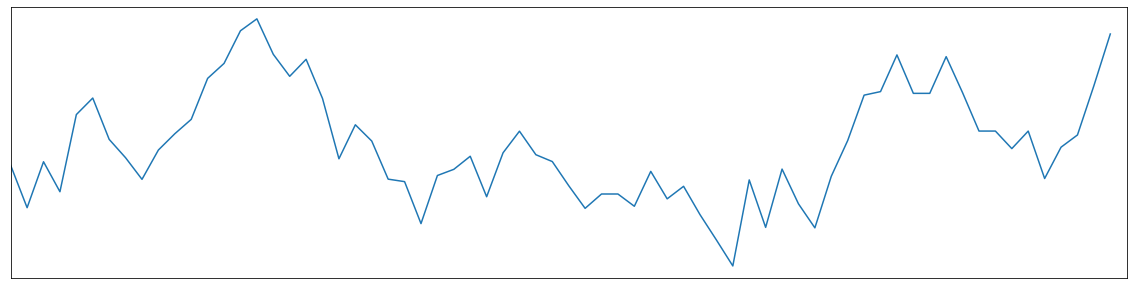

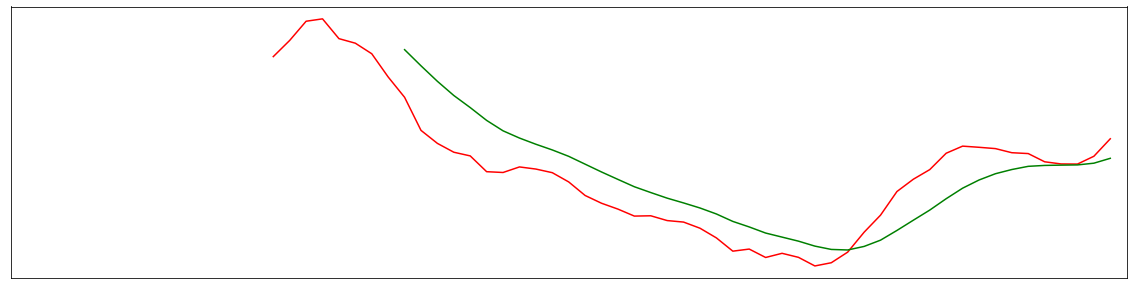

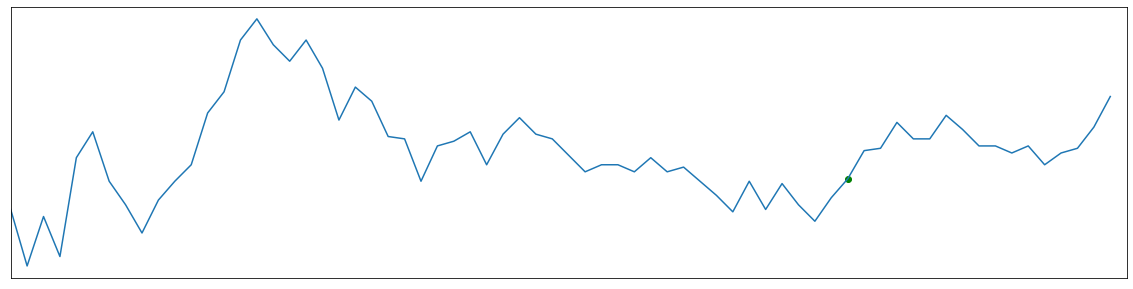

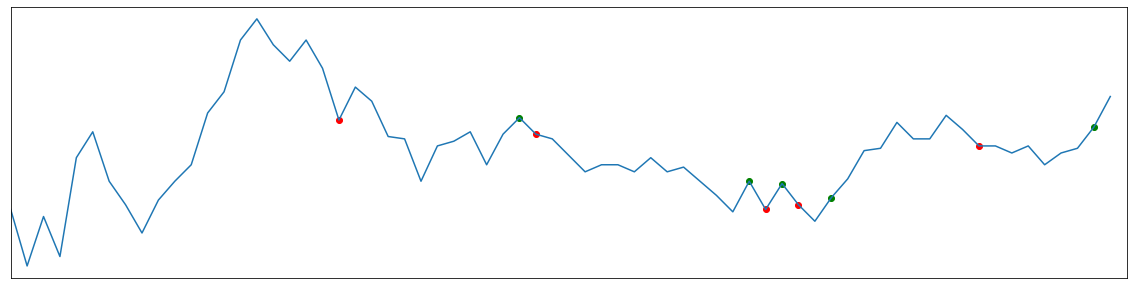

In [180]:
import matplotlib.pyplot as plt

# plot rsi
f = plt.figure(figsize = [20,5])
ax = f.add_subplot(111)
# ax.yaxis.tick_right()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.xlim([0,len(rsi_list)])
plt.plot(range(len(rsi_list)), rsi_list)
plt.show()

# plot macd and signal
f = plt.figure(figsize = [20,5])
ax = f.add_subplot(111)
# ax.yaxis.tick_right()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.xlim([0,len(rsi_list)])
start_ind = len(rsi_list) - len(macd_list)
plt.plot(range(start_ind, len(rsi_list)), macd_list, color = 'r')
start_ind = len(rsi_list) - len(ema_list)
if start_ind < 0:
    ema_list = ema_list[(-1*start_ind):]
    plt.plot(range(len(ema_list)), ema_list, color = 'g')
else:
    plt.plot(range(start_ind, len(rsi_list)), ema_list, color = 'g')
plt.show()

# plot closing prices and buy/sell logic #1
f = plt.figure(figsize = [20,5])
ax = f.add_subplot(111)
# ax.yaxis.tick_right()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.xlim([0,len(rsi_list)])
vals = data['Close'].values
vals = vals[(len(vals) - len(rsi_list)):] # get the last n values that has rsi values for it
plt.plot(range(len(rsi_list)), vals)
buy_index = np.array(list(range((len(vals)-len(buy_signals)), len(vals)))) - 1
buy_index = buy_index*buy_signals
buy_index = buy_index[buy_index != 0]
val_at_buy_ind = list(map(lambda x: vals[x], buy_index))
plt.scatter(buy_index, val_at_buy_ind, color = 'g')
sell_index = np.array(list(range((len(vals)-len(sell_signals)), len(vals)))) - 1
sell_index = sell_index*sell_signals
sell_index = sell_index[sell_index != 0]
val_at_sell_ind = list(map(lambda x: vals[x], sell_index))
plt.scatter(sell_index, val_at_sell_ind, color = 'r')
plt.show()

# plot closing prices and buy/sell logic #3
f = plt.figure(figsize = [20,5])
ax = f.add_subplot(111)
# ax.yaxis.tick_right()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.xlim([0,len(rsi_list)])
vals = data['Close'].values
vals = vals[(len(vals) - len(rsi_list)):] # get the last n values that has rsi values for it
plt.plot(range(len(rsi_list)), vals)
buy_index = np.array(list(range((len(vals)-len(buy_signals_2)), len(vals)))) 
buy_index = buy_index*buy_signals_2
buy_index = buy_index[buy_index != 0]
val_at_buy_ind = list(map(lambda x: vals[x], buy_index))
plt.scatter(buy_index, val_at_buy_ind, color = 'g')
sell_index = np.array(list(range((len(vals)-len(sell_signals_2)), len(vals)))) 
sell_index = sell_index*sell_signals_2
sell_index = sell_index[sell_index != 0]
val_at_sell_ind = list(map(lambda x: vals[x], sell_index))
plt.scatter(sell_index, val_at_sell_ind, color = 'r')
plt.show()

In [135]:
len(vals)

258

In [176]:
print((a / 1000))

[0.02666339]
